In [ ]:
h_complete.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


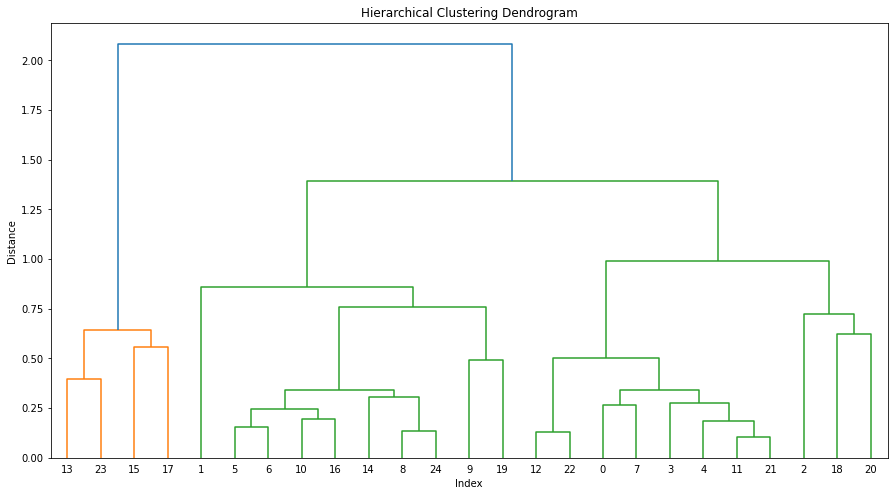

'/content'

In [ ]:
#@title Default title text
import pandas as pd
import matplotlib.pylab as plt

Univ1 = pd.read_excel("University_Clustering.xlsx")

Univ1.describe()
Univ1.info()

Univ = Univ1.drop(["State"], axis=1)

# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:, 1:])
df_norm.describe()

# for creating dendrogram 
from scipy.cluster.hierarchy import linkage, dendrogram
# import scipy.cluster.hierarchy as sch

z = linkage(df_norm, method = "complete", metric = "euclidean")

# Dendrogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()


# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)

Univ['clust'] = cluster_labels # creating a new column and assigning it to new column 

Univ1 = Univ.iloc[:, [7,0,1,2,3,4,5,6]]
Univ1.head()

# Aggregate mean of each cluster
Univ1.iloc[:, 2:].groupby(Univ1.clust).mean()
Univ1.iloc[:, 2:].groupby(Univ1.clust).std()
# creating a csv file 
Univ1.to_csv("University.csv", encoding = "utf-8")

import os
os.getcwd()


In [ ]:
Univ1.head()


,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90


In [ ]:
h_complete.labels_


array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2])

In [ ]:
Univ1.iloc[:, 2:].groupby(Univ1.clust).mean()
Univ1.iloc[:, 2:].groupby(Univ1.clust).std()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,37.549967,9.672830,14.351433,2.272364,6160.904616,6.903227
1,37.890192,8.616844,14.899664,4.193249,1417.252036,5.737305
2,41.663333,8.055364,12.050357,2.309401,11445.993562,5.165054


In [ ]:
Univ1.to_csv("University.csv", encoding = "utf-8")